In [1]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from rich import print

from apps.prod4a_merge_study import (BestCut, EventSelection, PFOSelection,
                                     SignalBackground, ShowerMergeQuantities, SplitSample)
from python.analysis import Master, Plots, vector
#plt.style.use('dark_background')
plt.style.use('ggplot')

def PCA(events : Master.Data, sample : ak.Array):
    l = events.recoParticles.showerLength[sample]
    theta = events.recoParticles.showerConeAngle[sample]
    shape = theta / np.sqrt(l)
    cnn = events.recoParticles.cnnScore[sample]
    nHits = events.recoParticles.nHits[sample]

    Plots.PlotHist(ak.ravel(np.sqrt(l)), xlabel="sqrt shower length")
    Plots.PlotHist(ak.ravel(theta), xlabel="cone angle (rad)")
    Plots.PlotHist2D(ak.ravel(np.sqrt(l)), ak.ravel(theta), bins=25, xlabel="sqrt l", ylabel="theta")
    Plots.PlotHist(ak.ravel(shape), xlabel="shape (rad)")
    Plots.PlotHist2D(ak.ravel(np.sqrt(l)), ak.ravel(cnn), xlabel="sqrt l", ylabel="cnn")
    Plots.PlotHist2D(ak.ravel(theta), ak.ravel(cnn), xlabel="sqrt l", ylabel="cnn")
    Plots.PlotHist2D(ak.ravel(shape), ak.ravel(cnn), xlabel="shape (rad)", ylabel="cnn")
    Plots.PlotHist2D(ak.ravel(shape), ak.ravel(l), xlabel="shape (rad/cm)", ylabel="l")
    Plots.PlotHist2D(ak.ravel(shape), ak.ravel(theta), xlabel="shape (rad)", ylabel="theta")
    Plots.PlotHist2D(ak.ravel(shape), ak.ravel(nHits), xlabel="shape (rad)", ylabel="nHits")
    return shape

In [2]:
# read Ntuples
#nEvents = 25000
events = Master.Data("work/ROOTFiles/Prod4a_6GeV_BeamSim_00.root")#, nEvents=nEvents)
EventSelection(events) # standard event selection
PFOSelection(events) # standard PFO selection
start_showers, to_merge = SplitSample(events)

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _TrueParticleData__pi0_MC.
  warnings.warn(f"Couldn't apply filters to {var}.")


'BeamMCFilter' executed in 9.7785s
number of dalitz decays: 222
'ApplyBeamFilter' executed in 6.4639s


\begin{tabular}{lllll}
\hline
 event selection                   & type        & number of events & percentage of events removed & percentage of 
events remaining \\
 no selection                      & -           & 100222           & -                            &               
\\
 beam -\ensuremath{>} pi0 + X                   & truth       & 27341            & 72.71956257109217            & 
100                            \\
 pi+ beam                          & backtracked & 19949            & 27.036319081233312           & 
72.96368091876668              \\
 diphoton decay                    & truth       & 19727            & 1.1128377362273798           & 
72.15171354376211              \\
 beam particle                     & reco        & 10017            & 49.22187864348355            & 
36.637284664057646             \\
 nPFP \ensuremath{>} 1                          & reco        & 10017            & 0.0                          & 
36.637284664057646             \\
 at least 1 true particle          & backtracked & 10017            & 0.0                          & 
36.637284664057646             \\
 both true photons are backtracked & backtracked & 4356             & 56.51392632524708            & 
15.932116601441052             \\
\hline
\end{tabular}

'EventSelection' executed in 108.7902s


Total number of PFOs: 2645612

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _RecoParticleData__beam_number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to _RecoParticleData__beamVertex.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to run.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to subRun.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:52: UserWarning: Couldn't apply filters to eventNum.
  warnings.warn(f"Couldn't apply filters to {var}.")


Total number of PFOs after cut: 2621555

Total number of PFOs: 2621555

Total number of PFOs after cut: 1345045

'PFOSelection' executed in 17.8316s


False

[394, 303, 245, 222, 226, 298, 198, 363, ... 303, 418, 244, 257, 262, 362, 382, 431]

[394, 303, 245, 222, 226, 298, 198, 363, ... 303, 418, 244, 257, 262, 362, 382, 431]

False

False

True

True

True

'SplitSample' executed in 24.2427s


 ### Look at the PFO shape based off shower length and cone angle (note here we naively assume tracks are shower like)
 define the shower shape as:
 
 $s = \frac{\theta}{\sqrt{l}}$
 
 where $\theta$ is the angle a cone would make if it encapsulated the shower and $l$ is the length of the shower along it's trajectory.
 Note the $\sqrt{l}$ is chosen rather than just l to scale the shower lengths based on their value so that a majority of PFOs dont have a shape << 1.

<Array [[0.0556, 0.0205], ... [0.0309, 0.361]] type='4356 * option[var * float64]'>

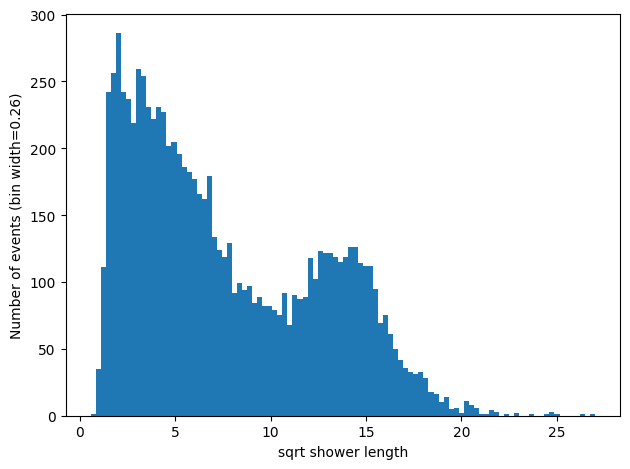

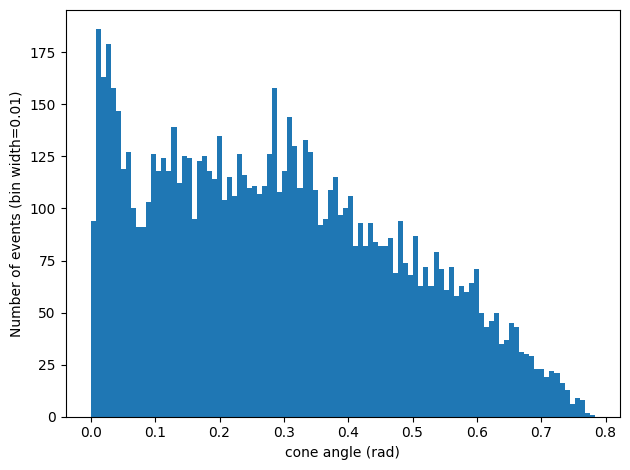

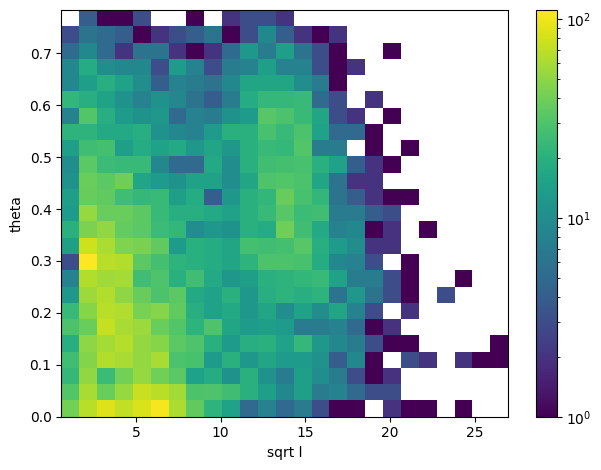

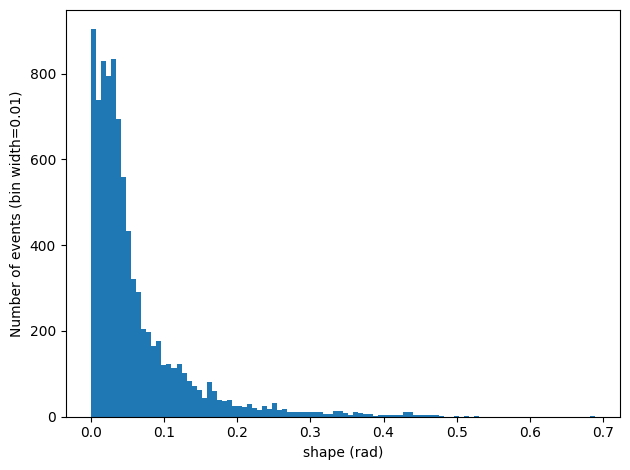

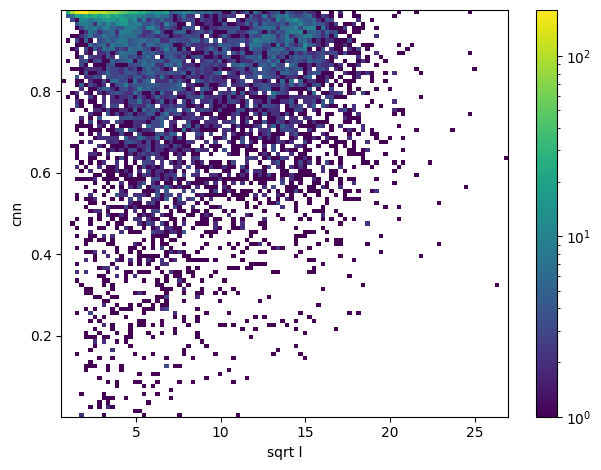

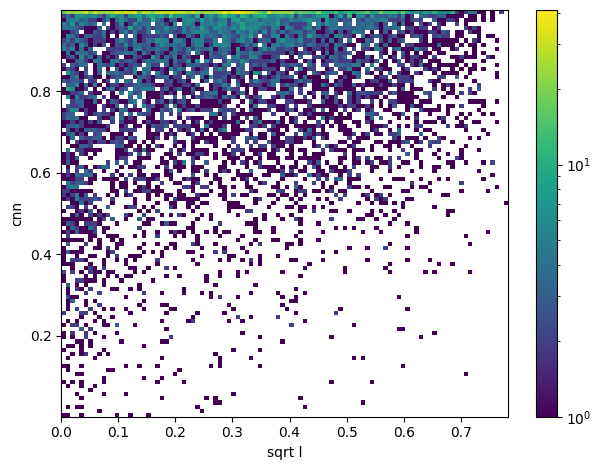

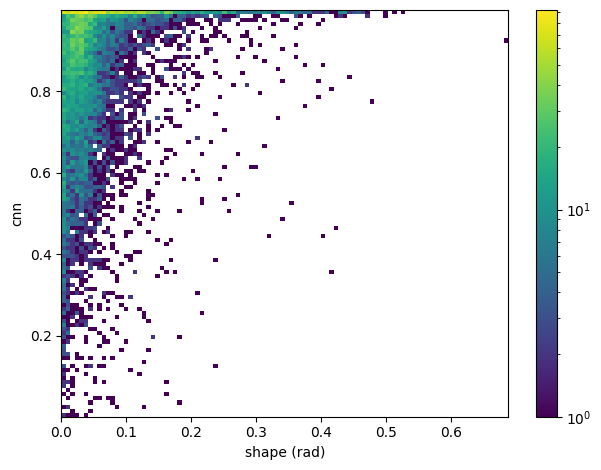

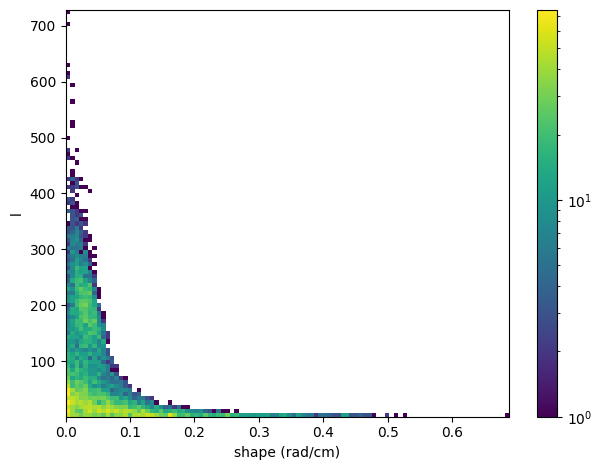

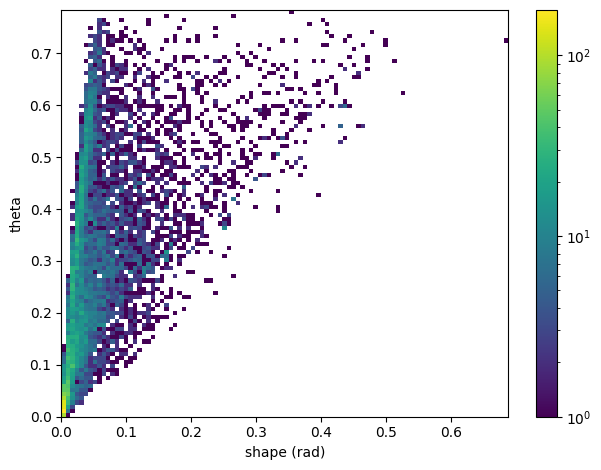

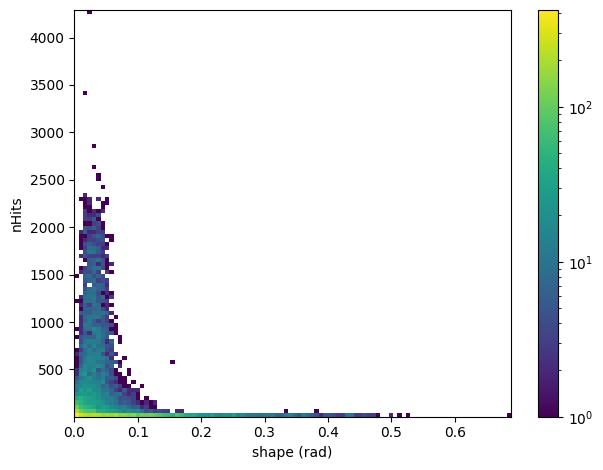

In [3]:
PCA(events, np.logical_or(*start_showers)) # start showers

Shower lengths can get quite large but the cone angle remains less than ~0.8 rad (45 degrees)
$\sqrt{l}$ seems to have a peak at ~15 and looking at a 2D histogram of $\sqrt{l}$ and $\theta$ there are two regions, one in the bottom left where the majority of PFOs remain, and then another at ~15 $\sqrt{l}$. So there looks like two classes of start shower shapes, perhaps the region at larger $\sqrt{l}$ are showers where more than one object has been reconstruced into the same PFO? (i.e. merging misreconstruction)


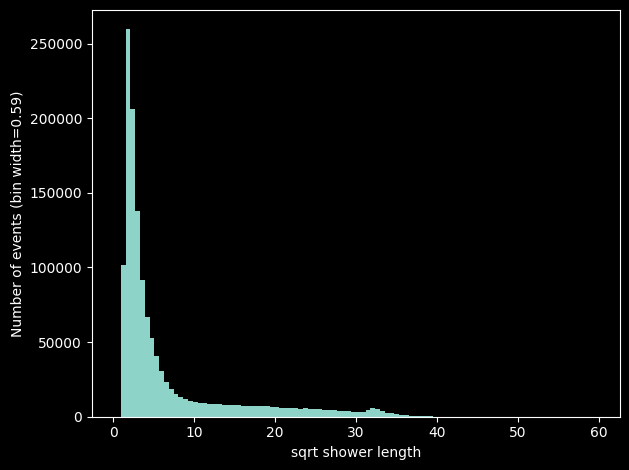

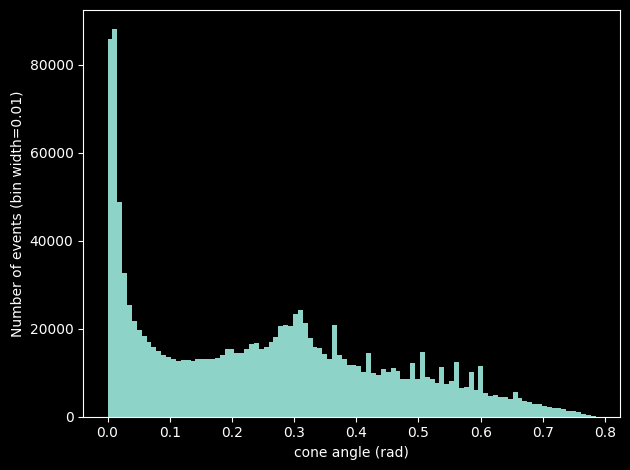

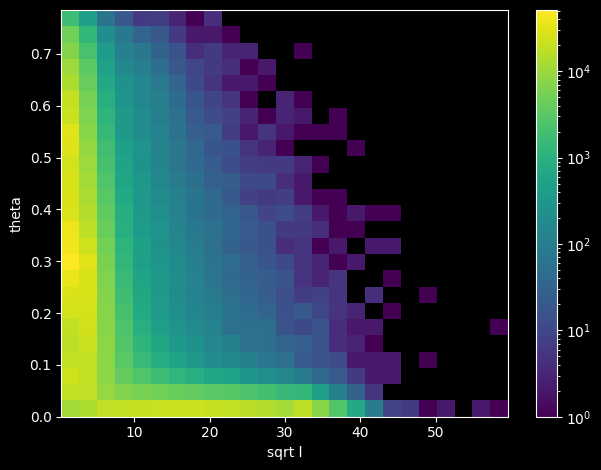

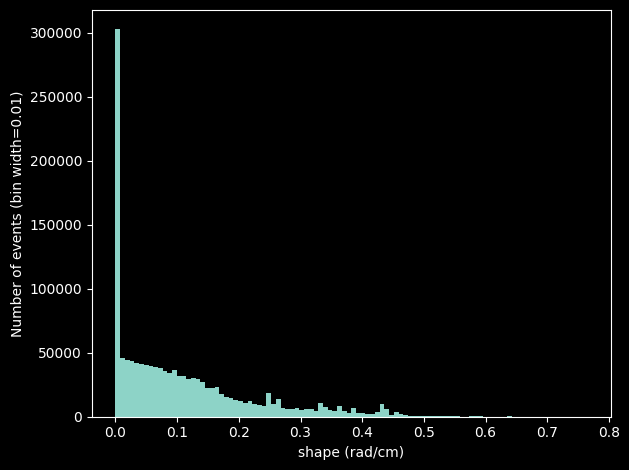

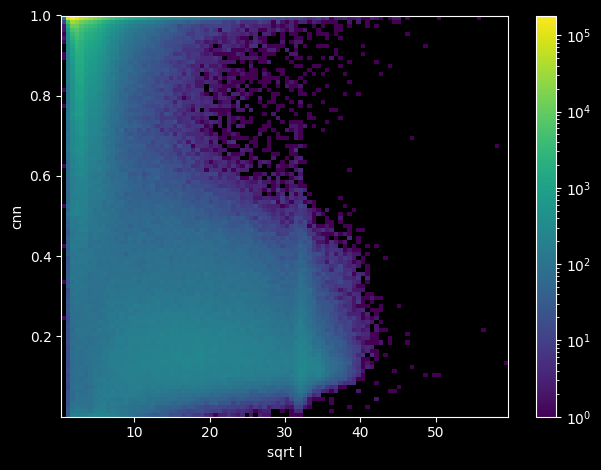

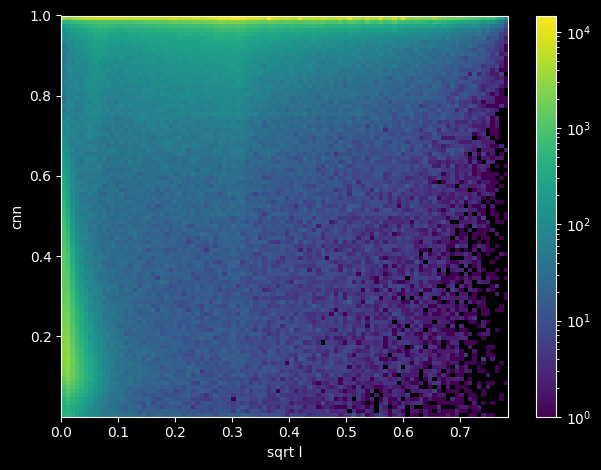

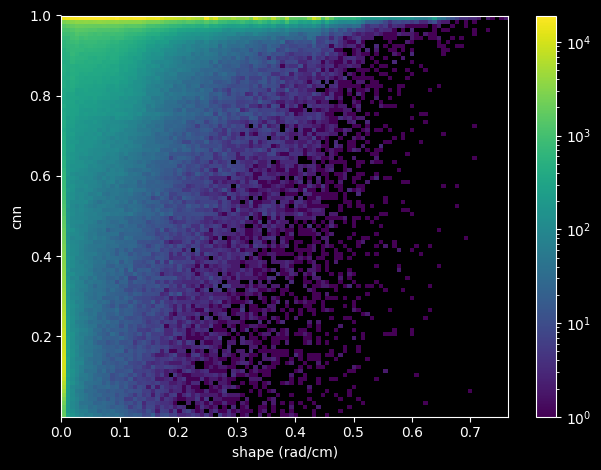

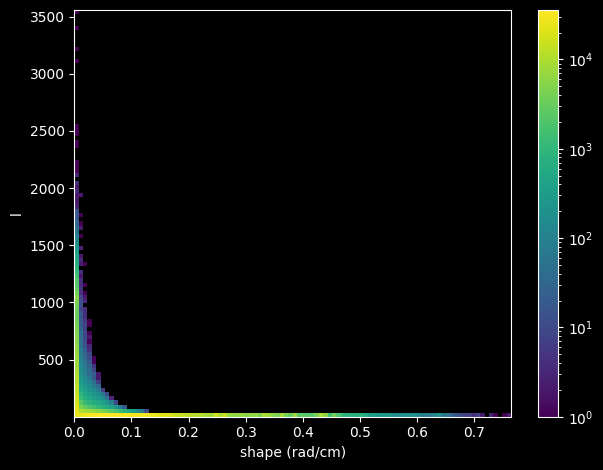

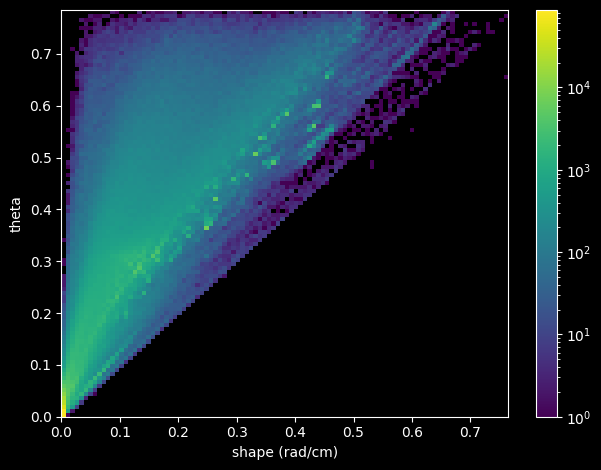

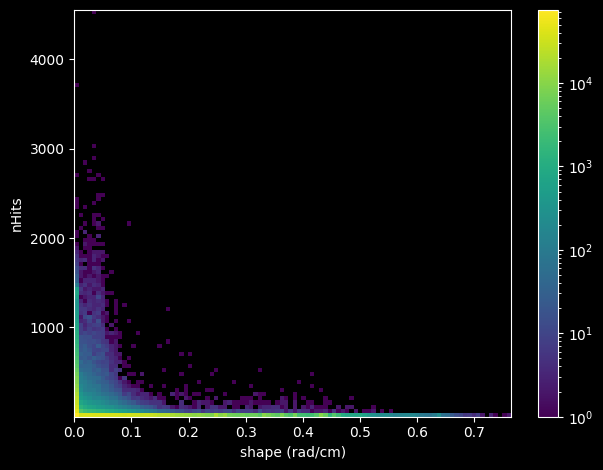

In [10]:
PCA(events, to_merge) # PFOs to try merge

Peak in $\sqrt{l}$ ~30 (not sure what this means). Seems to be for objects which are somewhat track like when looking at the $\sqrt{l}$ vs $cnn$.

Peak in the cone angle ~0.3. the peak close to 0 is inidicative of mostly trck like objects looking at $\theta$ vs $cnn$

In [ ]:
q = ShowerMergeQuantities(events, to_merge)
q.Evaluate(events, start_showers)

signal, background, signal_all = SignalBackground(events, start_showers, to_merge)

(array([[ 5.,  2.,  1., ...,  0.,  0.,  0.],
        [10.,  7.,  6., ...,  0.,  0.,  0.],
        [17., 14., 11., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 [array([0.00757977, 0.03795455, 0.06832932, 0.0987041 , 0.12907888,
         0.15945365, 0.18982843, 0.22020321, 0.25057798, 0.28095276,
         0.31132754, 0.34170231, 0.37207709, 0.40245187, 0.43282664,
         0.46320142, 0.4935762 , 0.52395097, 0.55432575, 0.58470053,
         0.6150753 , 0.64545008, 0.67582486, 0.70619963, 0.73657441,
         0.76694919, 0.79732397, 0.82769874, 0.85807352, 0.8884483 ,
         0.91882307, 0.94919785, 0.97957263, 1.0099474 , 1.04032218,
         1.07069696, 1.10107173, 1.13144651, 1.16182129, 1.19219606,
         1.22257084, 1.25294562, 1.28332039, 1.31369517, 1.34406995,
         1.37444472, 1.4048195 , 1.43519428, 1.46556905, 1.49594383,
         1.52631861, 1.55

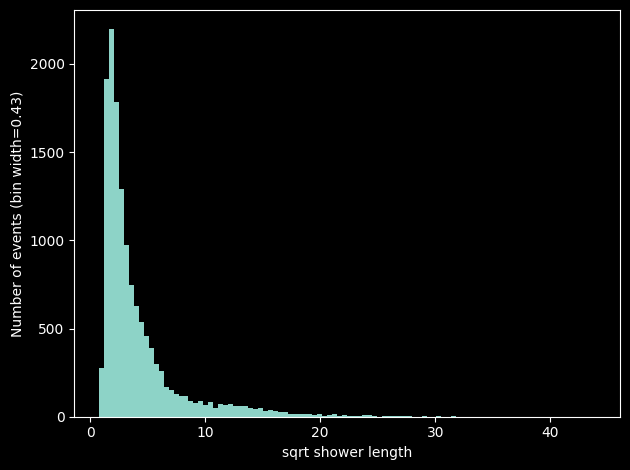

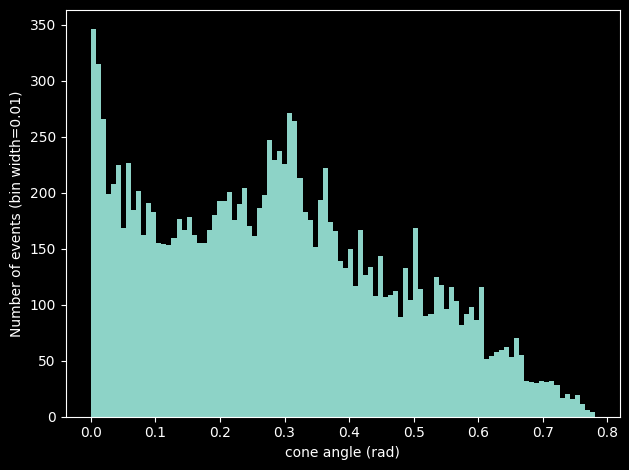

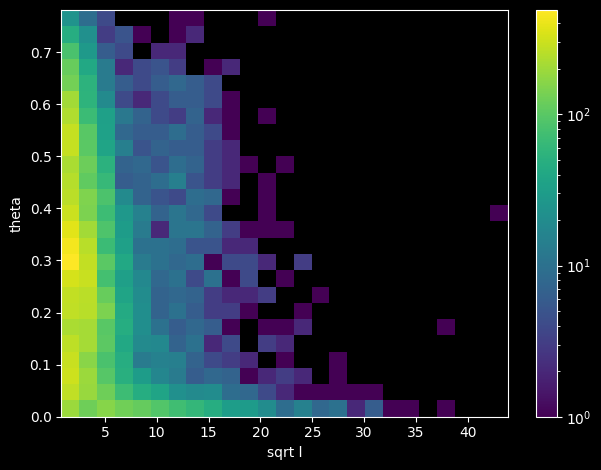

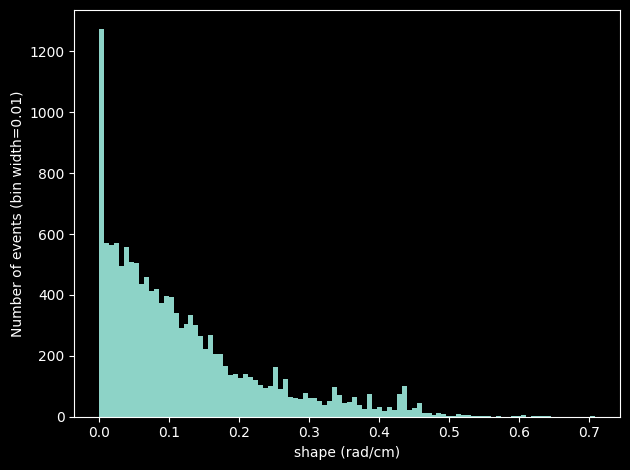

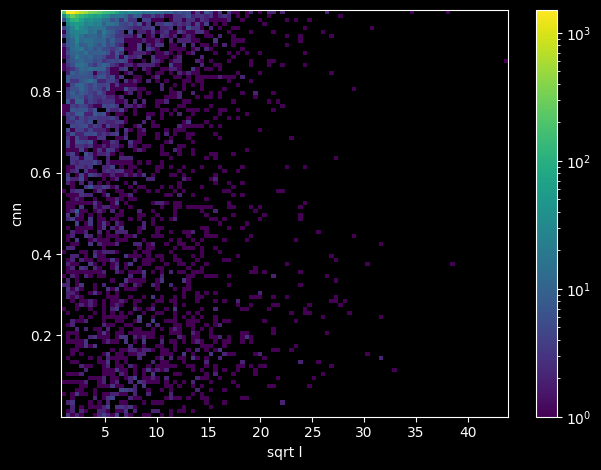

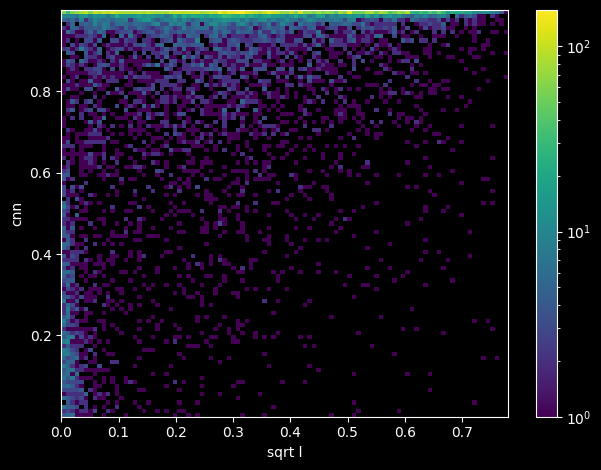

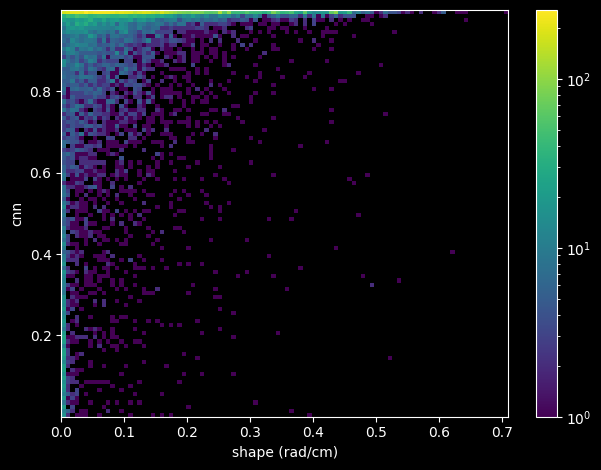

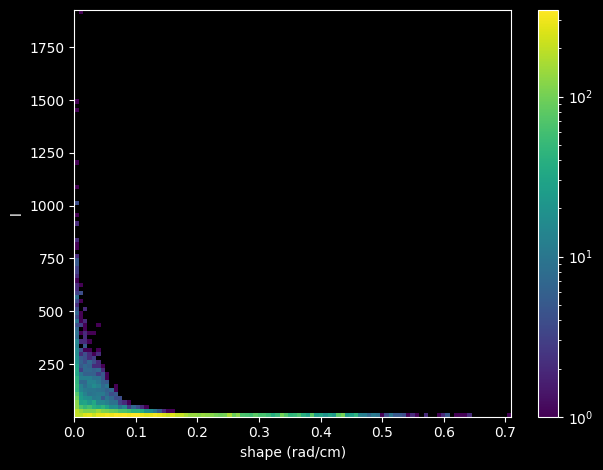

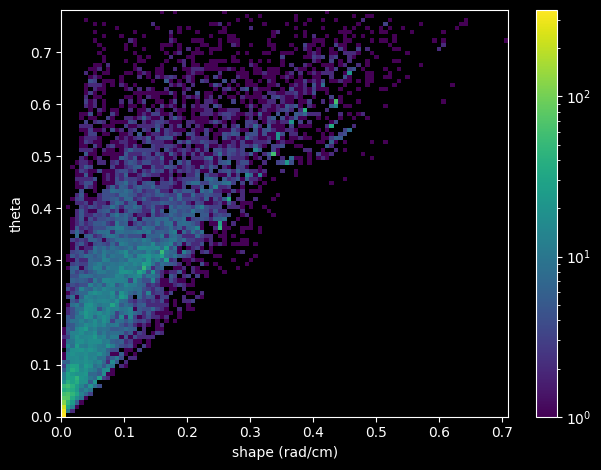

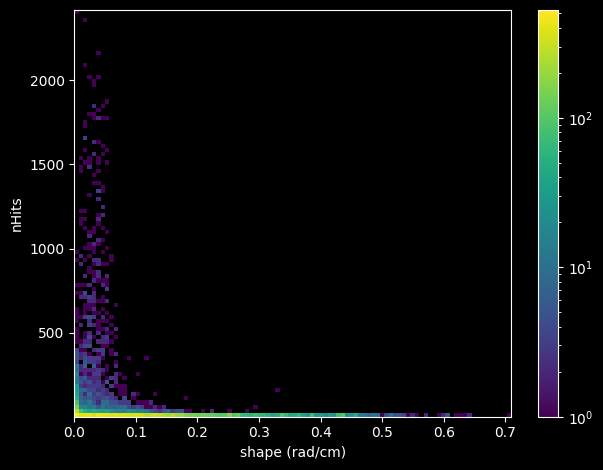

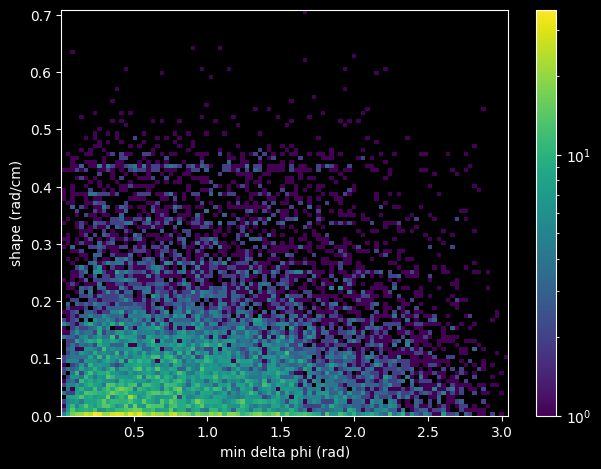

In [17]:
signal_shape = PCA(events, signal_all)
s = [q.delta_phi[j][signal_all] for j in range(2)] # get all PFOs related to the pi0 decay
s = ak.min(ak.concatenate(ak.unflatten(s, 1, -1), -1), -1) # take the smallest value as the signal
Plots.PlotHist2D(ak.ravel(s), ak.ravel(signal_shape), xlabel="min delta phi (rad)", ylabel="shape (rad/cm)")

signal distributions share common features with the whole sample. i.e not much distinction from signal and background by comparing shower shapes.

There appears to be no real trend between the shape and $\delta\phi$.

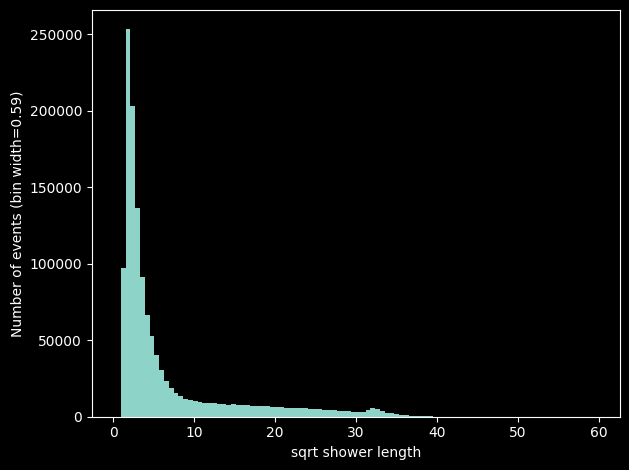

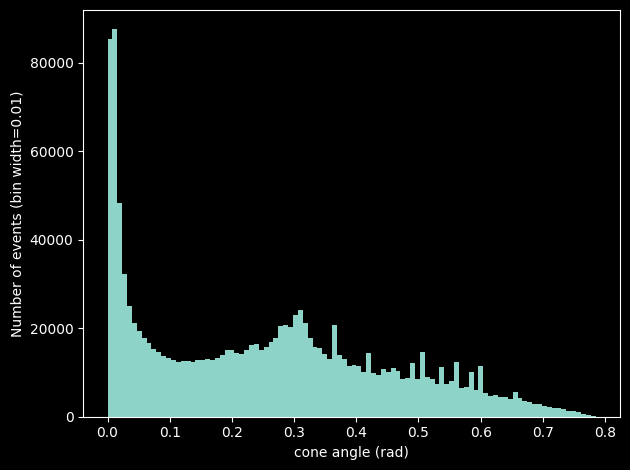

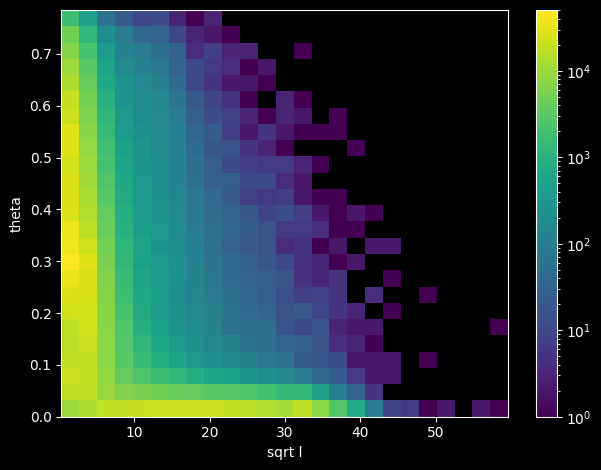

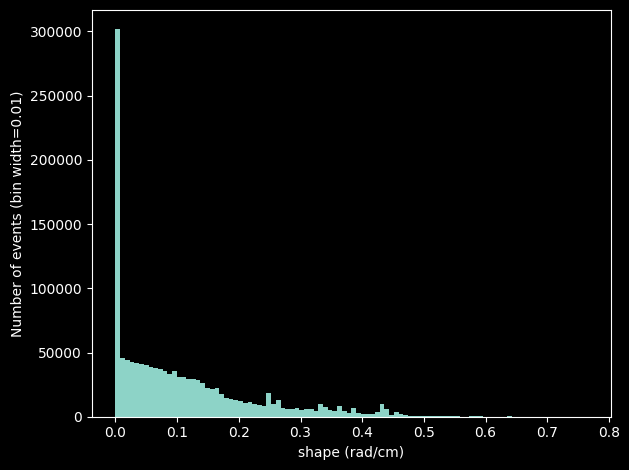

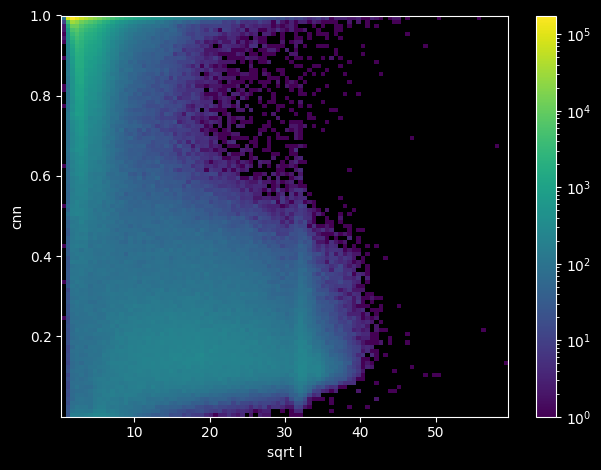

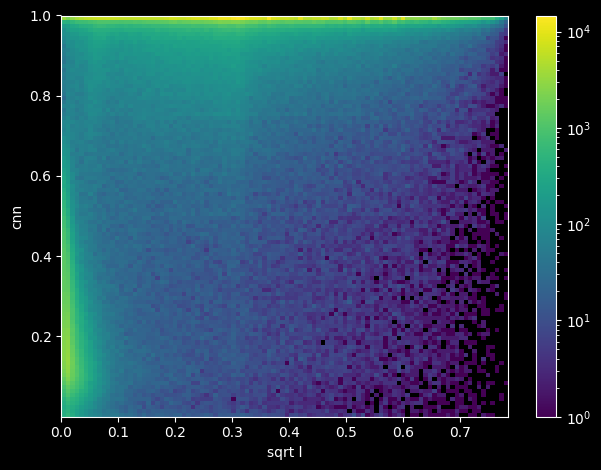

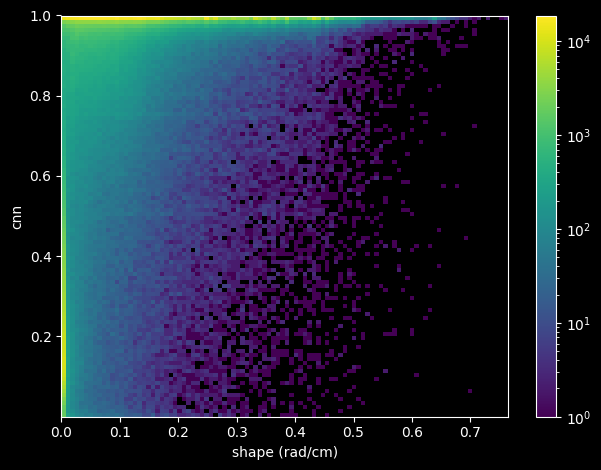

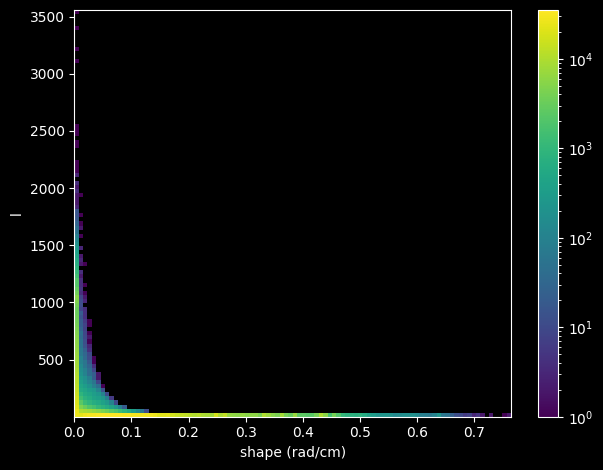

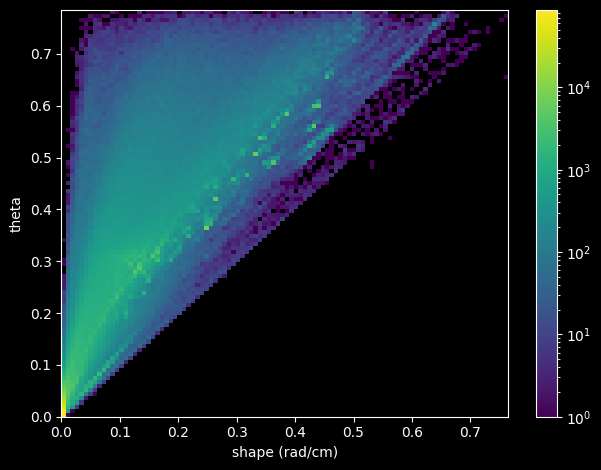

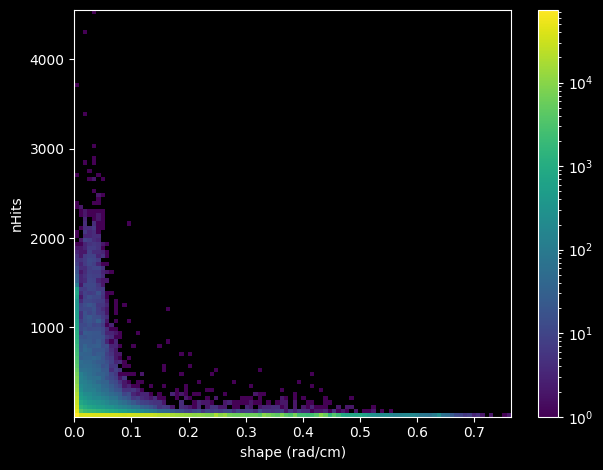

In [21]:
background_shape = PCA(events, background)

same as for signal, so no real distinction from signal and background.